In [5]:
from pydub import AudioSegment
song = AudioSegment.from_file("../wav-files/riptide_acoustic.wav")
# Filter out lower frequencies to reduce noise
song = song.high_pass_filter(80)
# Size of segments to break song into for volume calculations
SEGMENT_MS = 50
# dBFS is decibels relative to the maximum possible loudness
volume = [segment.dBFS for segment in song[::SEGMENT_MS]]

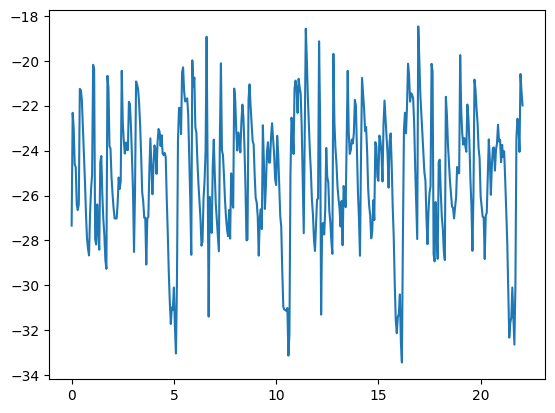

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x_axis = np.arange(len(volume)) * (SEGMENT_MS / 1000)
plt.plot(x_axis, volume)
plt.show()

[0.05, 0.4, 1.75, 5.2, 5.9, 6.6, 6.75, 7.25, 7.95, 8.65, 10.7, 12.1, 12.8, 16.2, 16.95, 17.6, 18.3, 19.0, 19.7, 21.75]


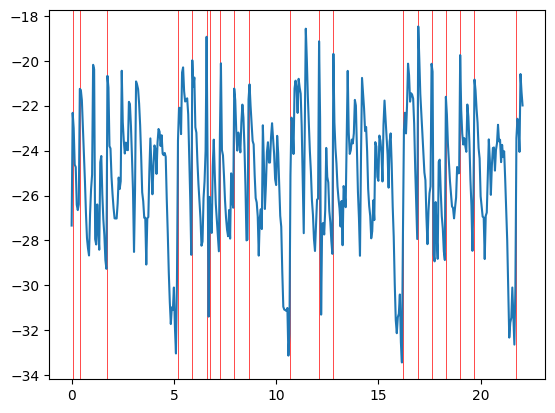

In [11]:

# Minimum volume necessary to be considered a note
VOLUME_THRESHOLD = -35
# The increase from one sample to the next required 
# to be considered a note
EDGE_THRESHOLD = 5
predicted_starts = []
for i in range(1, len(volume)):
    if (
        volume[i] > VOLUME_THRESHOLD and 
        volume[i] - volume[i - 1] > EDGE_THRESHOLD
    ):
        ms = i * SEGMENT_MS / 1000
        predicted_starts.append(ms)

print(predicted_starts)

for s in predicted_starts:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle="-")

plt.plot(x_axis, volume)
plt.show()